# SETTING ENVIRONMENT


In [1]:
"""# mount the colab with google drive
from google.colab import drive
drive.mount('/content/drive')"""

"# mount the colab with google drive\nfrom google.colab import drive\ndrive.mount('/content/drive')"

In [2]:
# set folder tempat kerja (current working directory)
import os
cwd = '/Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita'
# cwd = '/content/drive/MyDrive/Monitoring Berita'

os.chdir(cwd)

# INPUT PARAMETER PENCARIAN

In [3]:
# AI Model (deepseek/openai)
model_name          = "deepseek"
# Model version (openai only: gpt-3.5-turbo/gpt-4o-mini/gpt-5-nano/gpt-5-mini/gpt-5)
model_version       = "gpt-5-nano"
# Tanggal awal pencarian berita [YYYY-MM-DD]
start_date          = "2025-09-28"
# Tanggal akhir pencarian berita
end_date            = "2025-10-01"
# Keywords pencarian berita
keywords_pencarian  = ["purbaya rokok ilegal", "rokok ilegal"]
# Keywords analisis topic
keywords_topic      = ["rokok ilegal", "makan bergizi gratis", "tax amnesty", "sidak BNI", 'lainnya']
# Jumlah halaman pencarian
page_length         = 2

### Menyimpan Parameter Pencarian

In [4]:
# tandai waktu mulai proses
import time 
start_process_time = time.time()

In [5]:
from datetime import datetime, timedelta

# Konversi string ke datetime
start = datetime.strptime(start_date, "%Y-%m-%d")
end = datetime.strptime(end_date, "%Y-%m-%d")

# Buat list tanggal dari end_date ke start_date (descending)
search_date = [(end - timedelta(days=i)).strftime("%Y-%m-%d")
               for i in range((end - start).days + 1)]

In [6]:
import json
from pathlib import Path

config_path = Path("config.json")

# Data baru yang ingin disimpan/diupdate
variabel = {
    "search_date": search_date,
    "keywords": keywords_pencarian,
    "topic_keywords":keywords_topic,
    "max_page_length": page_length,
    "AI_name": model_name,
    "model_version": model_version
}

# Baca isi config.json lama (jika ada)
if config_path.exists():
    try:
        with open(config_path, "r", encoding="utf-8") as f:
            config = json.load(f)
    except Exception as e:
        print(f"Gagal membaca config.json: {e}")
        config = {}
else:
    config = {}

# Update hanya key yang ada di `variabel`
config.update(variabel)

# Simpan kembali ke file
with open(config_path, "w", encoding="utf-8") as f:
    json.dump(config, f, indent=4, ensure_ascii=False)

print(f"Config.json berhasil diperbarui: {config_path}")


Config.json berhasil diperbarui: config.json


# LANGKAH ANALISIS

## SCRAP DATA BERITA DI MEDIA ONLINE

### Google News

In [7]:
file_loc = os.path.join(cwd, 'tarik_daftar_berita', 'list_googlenews.ipynb')

%run "$file_loc"

[INFO] Mulai scrape Google News RSS | queries=2 | max_items_per_query=25 | date_filters=['2025-10-01', '2025-09-30', '2025-09-29', '2025-09-28']
[INFO] [QUERY] purbaya rokok ilegal => https://news.google.com/rss/search?q=purbaya+rokok+ilegal+when%3A7d&hl=id&gl=ID&ceid=ID:id
[INFO] [QUERY] rokok ilegal => https://news.google.com/rss/search?q=rokok+ilegal+when%3A7d&hl=id&gl=ID&ceid=ID:id


Decoded URL: https://ekbis.sindonews.com/read/1626051/34/purbaya-bakal-sikat-rokok-ilegal-seberapa-parah-peredarannya-1759046994
Decoded URL: https://surabaya.kompas.com/read/2025/10/01/111353878/kiai-jatim-dukung-menkeu-purbaya-berantas-rokok-ilegal
Decoded URL: https://pasardana.id/news/2025/9/29/rencana-menkeu-purbaya-buat-para-penjual-rokok-ilegal/
Decoded URL: https://www.pajak.com/pajak/penindakan-rokok-ilegal-bakal-semakin-diperketat-purbaya-jadi-jangan-main-main/
Decoded URL: https://www.metrotvnews.com/play/KYVC4EaR-lawan-produk-ilegal-menkeu-purbaya-tak-naikkan-cukai-rokok-pada-2026
Decoded URL: https://kumparan.com/kumparanbisnis/purbaya-diminta-gempur-rokok-ilegal-bea-cukai-kejar-sampai-ke-e-commerce-25wTqv6LRis
Decoded URL: https://www.cnbcindonesia.com/news/20250930135151-4-671543/tak-naikkan-cukai-rokok-2026-kantor-purbaya-dibanjiri-karangan-bunga
Decoded URL: https://news.ddtc.co.id/berita/nasional/1814109/dikritik-karena-tak-naikkan-tarif-cukai-rokok-begini-respons-pur

[INFO] Selesai. Tersimpan: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/daftar_berita/google_news_rss.xlsx (50 baris)


## MENGGABUNGKAN DATA

### Konsolidasi Data Url Berita

In [10]:
file_loc = os.path.join(cwd, '01_konsolidasi_data_berita.ipynb')

%run "$file_loc"

Membaca Excel:   0%|          | 0/1 [00:00<?, ?file/s]

[INFO] Duplikat dihapus: 4 baris | Total akhir: 46
[INFO] Selesai gabung. Total baris: 46 | File terbaca: 1
[INFO] Normalisasi selesai. Total baris: 46 | Berhasil: 46 | Gagal: 0
[INFO] Filter judul < 40 chars: dihapus 0 baris | sisa: 46
[INFO] Config berhasil diperbarui: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/config.json


File berhasil disimpan: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/konsolidasi_berita/hasil_gabungan_20251001_204151.csv


## BACA BERITA

### Membaca Data Url Berita

In [43]:
file_loc = os.path.join(cwd, '02_baca_link_berita.ipynb')

%run "$file_loc"

08:56:05 | INFO | Total URL untuk diproses: 414 (limit=None)


Scraping artikel:   0%|          | 0/414 [00:00<?, ?it/s]

08:56:53 | WARNING | Attempt 1 failed for https://ekonomi.espos.id/properti-jadi-salah-satu-penopang-purbaya-yakin-ekonomi-tumbuh-55-persen-2147001: HTTPSConnectionPool(host='ekonomi.espos.id', port=443): Max retries exceeded with url: /properti-jadi-salah-satu-penopang-purbaya-yakin-ekonomi-tumbuh-55-persen-2147001 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1000)')))
08:56:54 | WARNING | Attempt 2 failed for https://ekonomi.espos.id/properti-jadi-salah-satu-penopang-purbaya-yakin-ekonomi-tumbuh-55-persen-2147001: HTTPSConnectionPool(host='ekonomi.espos.id', port=443): Max retries exceeded with url: /properti-jadi-salah-satu-penopang-purbaya-yakin-ekonomi-tumbuh-55-persen-2147001 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1000)')))
08:56:54 | ERROR | Failed to fetch https://ekonomi.espos.id/properti-jadi-salah-satu-penopang-purbaya-yakin-ekonomi-tumbuh-55-pe

## LABELLING ISU


In [11]:
file_loc = os.path.join(cwd, '03_labelling_awal.ipynb')

%run "$file_loc"

Normalisasi tanggal_berita: total=46, sukses=46, gagal=0 (0.0%)
Filter tanggal: 2025-09-28 s.d 2025-10-01 (dari 46 -> 46)
Labeling selesai. Jumlah baris: 46


,kategori_isu,jumlah
0,Isu Kemenkeu,44
1,Isu Lainnya,2


Tersimpan: /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/hasil_labeling/hasil_labeling_20251001_204538.csv & /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/hasil_labeling/hasil_labeling_20251001_204538.xlsx
Berhasil update config.json di /Users/yusufpradana/Library/CloudStorage/OneDrive-Personal/Pekerjaan BMN/05. 2025/98_monitoring_berita/monitoring-berita/config.json


## ANALISIS DENGAN GEN AI

### Analisis Berita Kemenkeu, Internasional, dan Nasional

In [12]:
file_loc = os.path.join(cwd, '04_analisis_dengan_genAI.ipynb')

%run "$file_loc"

API keys - Deepseek: OK | OpenAI: OK
Provider yang dipakai: deepseek


Analisis berita (parallel deepseek):   0%|          | 0/44 [00:00<?, ?berita/s]

[WARNING] Attempt 1 provider=deepseek gagal: Tidak ditemukan blok JSON dalam respons.
[WARNING] Attempt 2 provider=deepseek gagal: Tidak ditemukan blok JSON dalam respons.
[WARNING] Attempt 3 provider=deepseek gagal: Tidak ditemukan blok JSON dalam respons.
[INFO] Berhasil update config.json di config.json


Pipeline selesai. Hasil disimpan di 00_hasil_analisis/seluruh_berita/analisis_ai_20251001_deepseek_default.csv
Monitoring sementara: {'execution_datetime': '2025-10-01 20:47:36', 'provider': 'deepseek', 'model_name': 'deepseek-chat', 'elapsed_seconds': 104.92, 'output_file': '00_hasil_analisis/seluruh_berita/analisis_ai_20251001_deepseek_default.csv', 'n_rows_result_df': 44}
Monitoring log ditulis/ditambahkan ke monitoring_log_genai.csv
    execution_datetime  provider     model_name  elapsed_seconds  \
0  2025-10-01 20:47:36  deepseek  deepseek-chat           104.92   

                                                                  output_file  \
0  00_hasil_analisis/seluruh_berita/analisis_ai_20251001_deepseek_default.csv   

   n_rows_in_memory  n_rows_output_file  
0                44                  44  


### Analisis Berita Penting

In [13]:
file_loc = os.path.join(cwd, '05_analisis_berita_penting copy.ipynb')

%run "$file_loc"

[INFO] ✅ AI Configuration loaded: DEEPSEEK
[INFO]    Model: deepseek-chat
[INFO]    Temperature: 0.2
[INFO]    Max Tokens: 500


=== KONFIGURASI AI MODEL ===


[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
[INFO] ✅ DEEPSEEK API connection successful
[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"


🎯 AI Model: DEEPSEEK (deepseek-chat)
🔧 Temperature: 0.2
📝 Max Tokens: 500
🔑 API Key: ********************...8d74

🧪 Testing AI connection...


[INFO] Membaca file analisis AI: 00_hasil_analisis/seluruh_berita/analisis_ai_20251001_deepseek_default.csv
[INFO] Total berita: 44
[INFO] Berita penting (filtered): 40


✅ Test Response: AI Ready!

✅ AI configuration completed successfully!
💡 Gunakan CALL_AI_MODEL(prompt) untuk memanggil AI di sel lain.

📋 Environment Variables yang diset:
   MODEL_ANALISIS = deepseek
   AI_MODEL_NAME = deepseek-chat
   DUMMY_MODE = 0
Berhasil memuat 40 berita penting

Sample berita penting:
                                                                                     judul_berita  \
0                Purbaya Bakal Sikat Rokok Ilegal, Seberapa Parah Peredarannya? - SINDOnews Ekbis   
16        Dukung Kebijakan Menkeu Purbaya, Indef Singgung Fenomena Rokok Ilegal - republika.co.id   
42                                     Ulama Jatim Dukung Menkeu Berantas Rokok Ilegal - detikcom   
39  Pengusaha Ungkap Kerugian Negara Akibat Rokok Ilegal Bisa Capai Rp 15 Triliun - InvestorTrust   
37              Modus Pedagang Ecommerce, Rokok Ilegal Dijual Jadi Pakaian Dalam - CNBC Indonesia   

   topik_llm  importance sentimen  
0   Kemenkeu        85.0  positif  
16  Kemenke

  0%|          | 0/40 [00:00<?, ?it/s][INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
 35%|███▌      | 14/40 [00:46<01:20,  3.09s/it][INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
 72%|███████▎  | 29/40 [01:33<00:38,  3.52s/it][INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
100%|██████████| 40/40 [02:06<00:00,  3.17s/it]
[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"


Analysis complete: 40 articles in 126.9s
Success: 40, Errors: 0
AI Provider: DEEPSEEK

Sample results (showing 3):
1. Purbaya Bakal Sikat Rokok Ilegal, Seberapa Parah Peredaranny...
   Resume: Menteri Keuangan Purbaya Yudhi Sadewa akan melakukan penindakan masif ...
   Dampak: Positif
2. Dukung Kebijakan Menkeu Purbaya, Indef Singgung Fenomena Rok...
   Resume: Ekonom Indef mendukung keputusan Menkeu Purbaya yang tidak menaikkan c...
   Dampak: Positif
3. Ulama Jatim Dukung Menkeu Berantas Rokok Ilegal - detikcom...
   Resume: Gus Maksum, pengasuh Ponpes Langitan Tuban, mendukung Menkeu Purbaya m...
   Dampak: Positif

File saved: 00_hasil_analisis/berita_penting/analisis_berita_penting_deepseek_20251001_204957.csv
=== GENERATOR DAFTAR BERITA & KONTEN ===
📊 Data tersedia: 40 berita
Memproses 40 berita yang berhasil dianalisis...
✅ Laporan disimpan di 00_laporan_cetak/daftar_berita_20251001_204957.txt
📄 Total baris: 126

📋 Preview laporan:
-----------------------------------------------

[INFO] HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"



✅ News Update disimpan di: 00_laporan_cetak/news_update_general_20251001_205007.txt
📄 Total baris: 33

📋 Preview News Update:
------------------------------------------------------------
News Update
Kebijakan Cukai Tembakau
Jakarta, Rabu, 1 Oktober 2025 (Pukul 20.00 WIB)

Pemberitaan terkait kebijakan cukai tembakau hari ini tercatat terdapat 40 berita (40 netral) di media online.

Sorotan Media Online
• Menkeu Purbaya akan lakukan penindakan masif terhadap rokok ilegal untuk amankan penerimaan negara.
• Penerimaan negara tergerus triliunan rupiah akibat maraknya peredaran rokok ilegal.
• Kebijakan tidak menaikkan cukai rokok 2026 didukung untuk lindungi industri dan lapangan kerja.
• Bea Cukai ungkap modus rokok ilegal di e-commerce yang disamar sebagai produk lain.
• Kerugian negara dari rokok ilegal ditaksir dapat mencapai Rp 15 triliun.
• Bea Cukai berhasil amankan 745 juta batang rokok ilegal dalam berbagai operasi.
• Penyelundupan 3,6 juta batang rokok ilegal di Makassar digagal

# Visualisasi Data

✅ Konfigurasi berhasil dimuat dari config.json
   ✅ File berita penting tersedia
✅ Data berita penting berhasil dimuat!

✅ Data siap untuk divisualisasikan!
🔄 Memulai preprocessing data untuk visualisasi...
📅 Konversi format tanggal...
   ✅ Konversi tanggal berhasil
🧹 Cleaning teks untuk word cloud...
   ✅ Text cleaning berhasil
📊 Grouping data untuk analisis...
   ✅ Grouping data berhasil
📈 Perhitungan statistik...
   ✅ Statistik berhasil dihitung
✅ Preprocessing selesai!

📋 Ringkasan Data Processed:
   • Total artikel: 40
   • Rentang tanggal: 4 hari
   • Rata-rata artikel/hari: 10.0
   • Jumlah media: 28
   • Kata unik untuk word cloud: 48

🎯 Data siap untuk visualisasi!
   📊 Sentiment distribution: 3 kategori
   📅 Timeline data: 12 data points
   🏷️ Topic data: 1 topik
   🌐 Media sources: 10 media
✅ Fungsi-fungsi visualisasi telah didefinisikan!
🚀 Memulai pembuatan semua visualisasi...
📊 Dataset Overview:
   • Periode: 2025-09-28 - 2025-10-01
   • Total berita: 40 artikel
   • Rata


📈 2. Line Chart - Timeline Sentimen Harian



📋 3. Stacked Bar Chart - Ringkasan Harian



🌐 4. Bar Chart - Top Media Sources



🔥 5. Heatmap - Sentimen per Media per Tanggal



☁️ 6. Word Cloud - Kata Kunci Populer


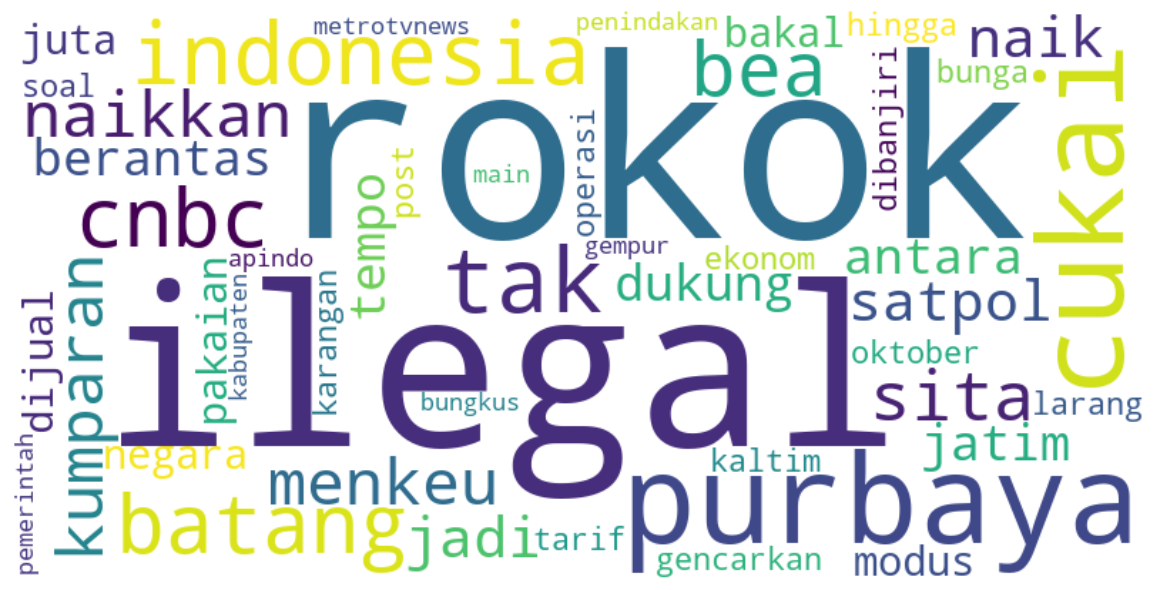


✅ Semua visualisasi telah ditampilkan!

📋 Insight Utama:
   🎯 Sentimen dominan: positif (92.5%)
   📺 Media terbanyak: www.cnbcindonesia.com (8 berita)
   🔤 Kata populer: rokok (42), ilegal (32), purbaya (21), cukai (19), tak (10)

✅ Semua visualisasi berhasil dibuat dan ditampilkan!
💡 Tip: Scroll ke atas untuk melihat grafik-grafik yang telah dibuat.
📋 DASHBOARD SUMMARY - MONITORING BERITA PENTING
📅 PERIODE ANALISIS
   • Tanggal: 28 September 2025 - 01 October 2025
   • Durasi: 4 hari
   • Total berita: 40 artikel
   • Rata-rata harian: 10.0 artikel/hari

😊 ANALISIS SENTIMEN
   😊 Positif: 37 berita (92.5%)
   😠 Negatif: 2 berita (5.0%)
   😐 Netral: 1 berita (2.5%)

🌐 TOP MEDIA SOURCES
   1. www.cnbcindonesia.com: 8 berita (20.0%)
   2. kumparan.com: 3 berita (7.5%)
   3. www.tempo.co: 3 berita (7.5%)
   4. www.metrotvnews.com: 2 berita (5.0%)
   5. ekbis.sindonews.com: 1 berita (2.5%)

🔤 TOP KEYWORDS
   1. 'rokok': 42 kali muncul
   2. 'ilegal': 32 kali muncul
   3. 'purbaya': 21 kali

In [19]:
file_loc = os.path.join(cwd, '06_visualisasi.ipynb')

%run "$file_loc"

# REKAP

In [14]:
# Tandai waktu selesai proses
end_process_time = time.time()
elapsed_time = end_process_time - start_process_time
# jadikan menit & detik
elapsed_minutes = int(elapsed_time // 60)
elapsed_seconds = int(elapsed_time % 60)
print(f"Waktu proses: {elapsed_minutes} menit {elapsed_seconds} detik")

Waktu proses: 12 menit 6 detik
